# 웹 크롤링

In [1]:
import lxml.html
import requests
import pandas as pd

In [2]:
url='https://search.shopping.naver.com/search/all?frm=NVSCTAB&origQuery=%EB%AC%B4%EB%A6%8E%EB%B3%B4%ED%98%B8%EB%8C%80&pagingIndex=1&pagingSize=40&productSet=total&query=%EB%AC%B4%EB%A6%8E%EB%B3%B4%ED%98%B8%EB%8C%80&sort=review&timestamp=&viewType=list'

In [6]:
#!pip install webdriver-manager

In [7]:
from selenium.webdriver import Chrome
from webdriver_manager.chrome import ChromeDriverManager

In [9]:
browser = Chrome(ChromeDriverManager().install())  
## ChromeDriverManager를 사용해 최신버전의 크롬드라이버를 자동으로 사용



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
There is no [win32] chromedriver for browser  in cache
Trying to download new driver from https://chromedriver.storage.googleapis.com/96.0.4664.45/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\wpdla\.wdm\drivers\chromedriver\win32\96.0.4664.45]


In [10]:
browser.get(url)

In [30]:
# 화면 이동 밑으로
browser.execute_script('window.scrollTo(0, document.body.scrollHeight);')

In [31]:
#쇼핑몰 URL구하기
url_links=browser.find_elements_by_css_selector('div.basicList_title__3P9Q7 a.basicList_link__1MaTN')

In [33]:
urls = []
for link in url_links:
    urls.append(link.get_attribute("href"))

In [34]:
len(urls)

40

In [35]:
#페이지 넘기기
page=browser.find_elements_by_css_selector('div.pagination_pagination__6AcG4 a.pagination_next__1ITTf')

In [36]:
page[0].click()

In [37]:
url_links=browser.find_elements_by_css_selector('div.basicList_title__3P9Q7 a.basicList_link__1MaTN')

In [38]:
for link in url_links:
    urls.append(link.get_attribute("href"))

In [39]:
len(urls)

80

In [40]:
browser.close()

리뷰 읽어보며 제품 리스트 추출

- 1.투어게인 https://smartstore.naver.com/two-again/products/4536803159
- 2. 에이더 https://smartstore.naver.com/sowonmall/products/447336205
- 3. 제로투히어로 https://smartstore.naver.com/zerotohero/products/3407776007
- 4. 잠스트 https://smartstore.naver.com/masterwook/products/2171683621
- 5. 바디프레임 https://smartstore.naver.com/emporia/products/2101304779
- 6. 에스비디 https://smartstore.naver.com/bxg/products/3896309171
- 7. 바우어파인트 https://smartstore.naver.com/bauerfeindkorea/products/746315181
- 8. 울티모 https://smartstore.naver.com/scrolling/products/4729415562
- 9. 에이더 바디바인 https://smartstore.naver.com/sowonmall/products/2160569906
- 10. 바우어파인트 NBA https://smartstore.naver.com/bauerfeindkorea/products/2155178936
- 11. 슈퍼비스트 https://smartstore.naver.com/seasonon/products/3900178279
- 12. 마이짐 https://smartstore.naver.com/myhomegym/products/4217685910
- 13. 리밴드 https://smartstore.naver.com/rehband/products/675240213

In [2]:
# url 직접 바꿔가면서 리뷰 수집함
url = 'https://smartstore.naver.com/two-again/products/4536803159' 

In [3]:
from selenium.webdriver import Chrome

browser = Chrome()
browser.get(url)

In [4]:
#리뷰 페이지 넘기기
links=browser.find_elements_by_css_selector('div._1HJarNZHiI._2UJrM31-Ry._3F77jPGGAN a')

In [5]:
re_data = []

In [9]:
import time

In [10]:
# 긍정리뷰 스크랩
for i in range(2,12):
    time.sleep(1)
    reviews = browser.find_elements_by_css_selector('div.YEtwtZFLDz span._3QDEeS6NLn')
    time.sleep(1)
    for review in reviews:
        re_data.append(review.text)
    time.sleep(1)
    links[i].click()
    time.sleep(1)

In [8]:
# 평점 높은 리뷰, 낮은 리뷰 순으로 보기
rank=browser.find_elements_by_css_selector('ul.EP5-YthxnX li')

In [9]:
#평점 낮은 리뷰
rank[3].click()

In [10]:
links=browser.find_elements_by_css_selector('div._1HJarNZHiI._2UJrM31-Ry._3F77jPGGAN a')

In [11]:
# 부정리뷰 스크랩
for i in range(2,12):
    time.sleep(1)
    reviews = browser.find_elements_by_css_selector('div.YEtwtZFLDz span._3QDEeS6NLn')
    time.sleep(1)
    for review in reviews:
        re_data.append(review.text)
    time.sleep(1)
    links[i].click()
    time.sleep(1)

In [12]:
len(re_data)

400

In [13]:
review_data=[]
for i in re_data:
    a=i.replace("\n"," ")
    review_data.append(a)

In [14]:
la_data = []

In [15]:
rank=browser.find_elements_by_css_selector('ul.EP5-YthxnX li')

In [16]:
#평점 높은 리뷰
rank[0].click()

In [17]:
links=browser.find_elements_by_css_selector('div._1HJarNZHiI._2UJrM31-Ry._3F77jPGGAN a')

In [18]:
# 긍정 리뷰에 대한 평점 스크랩
for i in range(2,12):
    time.sleep(1)
    labels = browser.find_elements_by_css_selector('div._37TlmH3OaI em._15NU42F3kT')
    time.sleep(1)
    for label in labels:
        la_data.append(label.text)
    time.sleep(1)
    links[i].click()
    time.sleep(1)

In [19]:
rank=browser.find_elements_by_css_selector('ul.EP5-YthxnX li')

In [20]:
rank[3].click()

In [21]:
links=browser.find_elements_by_css_selector('div._1HJarNZHiI._2UJrM31-Ry._3F77jPGGAN a')

In [22]:
# 부정 평점
for i in range(2,12):
    time.sleep(1)
    labels = browser.find_elements_by_css_selector('div._37TlmH3OaI em._15NU42F3kT')
    time.sleep(1)
    for label in labels:
        la_data.append(label.text)
    time.sleep(1)
    links[i].click()
    time.sleep(1)

In [23]:
len(la_data)

400

In [24]:
col_name = ['review']

In [25]:
df = pd.DataFrame(review_data, columns=col_name)

In [26]:
df['label']=la_data

In [27]:
df.head()

,review,label
0,아직까지도 잘 쓰고 있습니다ㅎㅎ 확실히 무릎을 잡아주니 무릎에 가해지는 부담도 줄고...,5
1,배송은 평일2일만에 빠르게 도착했고 문의응답 매우 친절하십니다.. 가격이 너무 싸서...,5
2,배송 2일 걸려서 빠르게 받았네요 문의에 응답도 친절해서 좋았어요 사이즈는 7mm라...,5
3,배송 빠르고 상품 잘 받았습니다 깔끔하게 잘 왔네요 운동할때 보호대가 꼭 필요하다 ...,5
4,배송 빠르고 상품 잘 받았습니다 깔끔하게 잘 왔네요 운동할때 보호대가 꼭 필요하다 ...,5


## 전처리

In [28]:
df.duplicated(['review','label'])

0      False
1      False
2      False
3      False
4       True
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [29]:
df = df.drop_duplicates() 

In [30]:
df = df.astype({'label': 'int'})

In [31]:
# 3점 이하의 점수는 0점으로, 4점이상의 점수는 1점으로 변환
df1=df['label'].apply(lambda x : 1 if x>3 else 0)

In [32]:
df['label']=df1

In [33]:
df

,review,label
0,아직까지도 잘 쓰고 있습니다ㅎㅎ 확실히 무릎을 잡아주니 무릎에 가해지는 부담도 줄고...,1
1,배송은 평일2일만에 빠르게 도착했고 문의응답 매우 친절하십니다.. 가격이 너무 싸서...,1
2,배송 2일 걸려서 빠르게 받았네요 문의에 응답도 친절해서 좋았어요 사이즈는 7mm라...,1
3,배송 빠르고 상품 잘 받았습니다 깔끔하게 잘 왔네요 운동할때 보호대가 꼭 필요하다 ...,1
5,(+사진은 오자마자 대충 착용하고 추천해준 친구에게 보내주는 용도로 썼던거고 저 이...,0
...,...,...
395,배송이 조금 느립니다. 상품은 일상활동에는 조금 덥고 답답한 느낌이 있네요,0
396,두껍긴 한데 냄새가 넘 심해서 ㅠㅠ 계속 냄세 빼는중 ㅠㅠ,0
397,짱짱해서 좋긴한데 고무 냄새같은게 좀 많이 나기는 하네요 세탁하면 괜찮겠죠..,0
398,쫀쫀하니 무릎을 잘 잡아주는것 같아요. 근데 화학냄새가 많이 나요;; 제가 보호대를...,0


In [34]:
 df.to_csv("df1.csv")

## 단어문서행렬

In [41]:
import stanza

In [42]:
stanza.download('ko')

2021-04-29 02:27:59 INFO: Downloading default packages for language: ko (Korean)...
2021-04-29 02:28:00 INFO: File exists: C:\Users\wpdla\stanza_resources\ko\default.zip.
2021-04-29 02:28:02 INFO: Finished downloading models and saved to C:\Users\wpdla\stanza_resources.


In [43]:
nlp = stanza.Pipeline('ko')

2021-04-29 02:28:05 INFO: Loading these models for language: ko (Korean):
| Processor | Package |
-----------------------
| tokenize  | kaist   |
| pos       | kaist   |
| lemma     | kaist   |
| depparse  | kaist   |

2021-04-29 02:28:05 INFO: Use device: cpu
2021-04-29 02:28:05 INFO: Loading: tokenize
2021-04-29 02:28:05 INFO: Loading: pos
2021-04-29 02:28:05 INFO: Loading: lemma
2021-04-29 02:28:06 INFO: Loading: depparse
2021-04-29 02:28:06 INFO: Done loading processors!


In [51]:
doc = nlp(df.review[0])

In [1]:
from kiwipiepy import Kiwi
kiwi = Kiwi()
kiwi.prepare()

0

In [2]:
import pandas as pd
df = pd.read_csv('df1.csv', index_col = 0)

In [6]:
def extract_nouns(text):
    result = kiwi.analyze(text)
    for token, pos, _, _ in result[0][0]:
        if pos[0] in 'N':
            yield token

In [52]:
doc

[
  [
    {
      "id": 1,
      "text": "아직까지도",
      "lemma": "아직+까지도",
      "upos": "ADV",
      "xpos": "ncn+jxc",
      "head": 3,
      "deprel": "advcl",
      "misc": "start_char=0|end_char=5"
    },
    {
      "id": 2,
      "text": "잘",
      "lemma": "잘",
      "upos": "ADV",
      "xpos": "mag",
      "head": 3,
      "deprel": "advmod",
      "misc": "start_char=6|end_char=7"
    },
    {
      "id": 3,
      "text": "쓰고",
      "lemma": "쓰+고",
      "upos": "VERB",
      "xpos": "pvg+ecx",
      "head": 7,
      "deprel": "dislocated",
      "misc": "start_char=8|end_char=10"
    },
    {
      "id": 4,
      "text": "있습니다ㅎㅎ",
      "lemma": "있+습니다+를+원",
      "upos": "NOUN",
      "xpos": "px+ecs+jxt",
      "head": 3,
      "deprel": "aux",
      "misc": "start_char=11|end_char=17"
    },
    {
      "id": 5,
      "text": "확실히",
      "lemma": "확실+히",
      "upos": "ADV",
      "xpos": "mag+xsa",
      "head": 7,
      "deprel": "advmod",
      "misc": "start_char=1

In [7]:
list(extract_nouns(df.review[0]))

['무릎',
 '무릎',
 '부담',
 '원래',
 '통증',
 '통증',
 '하나',
 '대박',
 '헬스',
 '분',
 '무릎',
 '거',
 '분',
 '추천',
 '써보',
 '차이',
 '설명',
 '분',
 '거',
 '런닝',
 '때']

In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer(max_features=100, tokenizer=extract_nouns)

In [38]:
tdm = cv.fit_transform(df['review'])

In [39]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

In [40]:
word_count.sort_values('빈도', ascending=False).head(10)

,단어,빈도
33,무릎,159
5,거,123
6,것,92
27,때,86
83,착용,83
48,사이즈,69
17,냄새,67
61,운동,66
47,사용,59
9,구매,56


In [41]:
word_count.to_csv('df1-count.csv')

In [42]:
word_count = pd.read_csv('df1-count.csv')

In [43]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()

In [44]:
from wordcloud import WordCloud

In [45]:
wc = WordCloud(font_path='C:/Windows/Fonts/Malgun.ttf',
               background_color='white',
               max_words=50,
               width=400, height=300)

In [46]:
cloud = wc.generate_from_frequencies(count_dic)

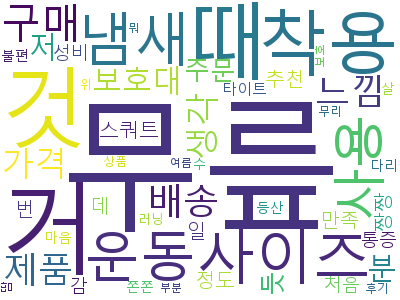

In [47]:
cloud.to_image()

In [48]:
cloud.to_file('cloud1.png')

## 감성분석

In [8]:
import pandas as pd
df=pd.read_csv('df13.csv', index_col = 0)
df.head()

,review,label
0,예전에 사용하던 제품이 낡아서 재구매했어요. 배송 진짜빠르네요. 포장상태도 좋아요,1
1,하체운동 하면 무릎이 화끈거렸는데 완전 해결됬어요. 이젠 필수품 입니다. 마음 놓고...,1
2,배송 빠르고 뽁뽁이에 잘 포장돼서 왔어요~~~ 만족합니다~!,1
3,좋아요 이거 끼면 크로스핏 할 때 무릎 하나도 안파요,1
4,처음사용하는 무릅보호대 지인 추천으로 구매합니다,1


In [9]:
from kiwipiepy import Kiwi
kiwi = Kiwi()
kiwi.prepare()

0

In [10]:
def extract_keywords(text):
    result = kiwi.analyze(text)
    for token, pos, _, _ in result[0][0]:
        if pos[0] in 'NV':
            yield f'{token}/{pos}'

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
cv = CountVectorizer(max_features=500, tokenizer=extract_keywords)
dtm = cv.fit_transform(df.loc[:, 'review'])

In [12]:
trans = TfidfTransformer()
dtm2 = trans.fit_transform(dtm)

In [13]:
words = cv.get_feature_names()

In [14]:
import joblib
joblib.dump({'words': words, 'dtm': dtm, 'dtm2': dtm2}, 'df13.pkl')

['df13.pkl']

In [15]:
data = joblib.load('df13.pkl')
locals().update(data)
import pandas as pd
df = pd.read_csv('df13.csv')

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x = dtm2
y = df.label.values[:] 

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=111) 

In [19]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#모델의 학습방식 정하기

In [21]:
# Early Stopping
model.fit(x_train.A, y_train, epochs=100, validation_split=0.1, 
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy')])

Epoch 1/100
8/8 [==============================] - 3s 259ms/step - loss: 0.6857 - accuracy: 0.5583 - val_loss: 0.6830 - val_accuracy: 0.6296
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6808 - accuracy: 0.6662 - val_loss: 0.6761 - val_accuracy: 0.6667
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6706 - accuracy: 0.7768 - val_loss: 0.6693 - val_accuracy: 0.7407
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 0.6593 - accuracy: 0.8386 - val_loss: 0.6626 - val_accuracy: 0.7407


In [22]:
model.fit(x_train.A, y_train, epochs=4)

Epoch 1/4
9/9 [==============================] - 0s 1ms/step - loss: 0.6524 - accuracy: 0.8647
Epoch 2/4
9/9 [==============================] - 0s 1ms/step - loss: 0.6436 - accuracy: 0.9060
Epoch 3/4
9/9 [==============================] - 0s 2ms/step - loss: 0.6348 - accuracy: 0.9098
Epoch 4/4
9/9 [==============================] - 0s 2ms/step - loss: 0.6263 - accuracy: 0.9098


In [23]:
model.evaluate(x_test.A, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.6363 - accuracy: 0.8657


[0.6363167762756348, 0.8656716346740723]

In [24]:
model.save('df13.krs')

INFO:tensorflow:Assets written to: df13.krs\assets


### 가중치분석

In [25]:
model = tf.keras.models.load_model('df13.krs')

In [26]:
w, b = model.weights
w.numpy()

array([[-5.65158017e-02],
       [ 7.08173290e-02],
       [-8.54530651e-03],
       [ 1.16458043e-01],
       [-5.66131435e-02],
       [-3.45097743e-02],
       [ 4.44155559e-02],
       [ 1.49230048e-01],
       [-7.49971122e-02],
       [ 3.06414887e-02],
       [ 1.93617661e-02],
       [ 1.03473492e-01],
       [ 9.85333100e-02],
       [-6.02771640e-02],
       [ 1.53118670e-01],
       [ 5.84168620e-02],
       [ 1.24694206e-01],
       [ 4.67616133e-02],
       [-4.23276164e-02],
       [ 5.22565935e-03],
       [-3.88695188e-02],
       [ 4.30852436e-02],
       [ 9.36819091e-02],
       [-2.04174276e-02],
       [ 7.10906163e-02],
       [ 1.39759039e-04],
       [-9.65544656e-02],
       [ 1.23719066e-01],
       [ 1.63284540e-02],
       [-2.00831667e-02],
       [ 3.88500988e-02],
       [-2.91901864e-02],
       [ 6.13200385e-03],
       [ 1.18269786e-01],
       [-2.64442451e-02],
       [ 2.59835627e-02],
       [ 8.36453512e-02],
       [-1.71344467e-02],
       [ 2.6

In [27]:
import pandas as pd
word_sent = pd.DataFrame({'토큰': words, '가중치': w.numpy().flat})

In [28]:
word_sent.sort_values('가중치').head()
#부정단어

,토큰,가중치
296,임/NNP,-0.128212
48,높/VA,-0.119332
365,중고/NNG,-0.114850
325,전적/NNG,-0.108050
341,조임/NNP,-0.107360


In [29]:
word_sent.sort_values('가중치').tail()
#긍정단어

,토큰,가중치
14,거/NNB,0.153119
212,스쿼트/NNP,0.160003
173,밴드/NNG,0.161501
470,하/VV,0.165251
346,좋/VA,0.172762


## 주제분석 LSA

In [30]:
import pandas as pd
df = pd.read_csv('df13.csv', index_col = 0)
df.head()

,review,label
0,예전에 사용하던 제품이 낡아서 재구매했어요. 배송 진짜빠르네요. 포장상태도 좋아요,1
1,하체운동 하면 무릎이 화끈거렸는데 완전 해결됬어요. 이젠 필수품 입니다. 마음 놓고...,1
2,배송 빠르고 뽁뽁이에 잘 포장돼서 왔어요~~~ 만족합니다~!,1
3,좋아요 이거 끼면 크로스핏 할 때 무릎 하나도 안파요,1
4,처음사용하는 무릅보호대 지인 추천으로 구매합니다,1


In [31]:
from kiwipiepy import Kiwi
kiwi = Kiwi()
kiwi.prepare()

0

In [32]:
def extract_keywords(text):
    result = kiwi.analyze(text)
    for token, pos, _, _ in result[0][0]:
        if pos[0] in 'NV':
            yield f'{token}'

In [33]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
##비교해보고 결과 좋은 거로 고르기
cv = TfidfVectorizer(max_features=1000,tokenizer=extract_keywords)
x = cv.fit_transform(df.review)
words = cv.get_feature_names()

In [34]:
from sklearn.decomposition import TruncatedSVD
x.shape

(333, 658)

In [35]:
svd = TruncatedSVD(n_components=100, random_state=1234)
# 100차원(주제)으로 줄인다(임의로 줄인거 병렬분석해서 차원크기 결정해아햠)
svd.fit(x)

TruncatedSVD(n_components=100, random_state=1234)

In [36]:
svd.components_

array([[ 1.38884252e-03,  3.42773724e-03,  1.15586760e-02, ...,
         5.49988618e-03,  5.32690267e-03,  9.47753827e-03],
       [-1.10053439e-05, -3.23265405e-04, -1.13097511e-02, ...,
        -4.90755797e-03, -1.59866471e-03,  3.41735647e-04],
       [-3.66817941e-03, -7.02804446e-03,  4.71209488e-04, ...,
        -3.08822212e-03, -1.11949258e-02, -1.62683835e-02],
       ...,
       [-1.67003193e-02, -5.69003802e-03, -1.82756843e-02, ...,
        -2.52375547e-02, -5.76101788e-03,  4.32012375e-02],
       [ 1.20164939e-02,  1.74522500e-02,  7.49111341e-02, ...,
         2.05068743e-02,  2.33358791e-03,  2.61909785e-02],
       [ 2.36235093e-02,  4.04446968e-02,  9.38911473e-02, ...,
         2.05679774e-02, -7.39092197e-03, -1.09249820e-02]])

In [37]:
word_idx = words.index('운동') 
svd.components_[:, word_idx] 

array([ 1.56296888e-01, -1.01584963e-01, -1.82168814e-01, -6.32992035e-02,
        1.94188956e-01,  4.88683729e-01, -2.64150488e-01,  8.75611869e-02,
       -2.65228696e-01,  1.04915030e-01,  1.52656450e-01,  1.59192022e-01,
        3.61965471e-04, -1.42232695e-01, -8.81921279e-02, -2.93691160e-02,
        6.10623700e-02, -1.12195806e-01,  9.41056424e-02, -1.35596787e-01,
       -7.63280352e-02,  1.28578399e-01,  1.40638835e-01, -5.26925096e-02,
       -1.75966797e-01,  1.43463645e-02,  1.05633061e-01,  3.41854834e-02,
        1.38742144e-01,  7.74051758e-02,  2.91823118e-02, -4.87269105e-02,
        2.97595060e-02,  3.51959416e-02,  5.11712610e-02, -6.70984856e-02,
       -1.09328253e-01,  5.49008776e-02, -8.76451650e-02, -1.25498529e-02,
        4.84189671e-03,  1.01878978e-02,  5.84367082e-03, -5.89852940e-02,
        1.31364897e-02,  1.50725853e-02,  1.31759587e-02, -2.59380331e-02,
       -6.46223417e-02, -2.18476852e-02,  1.09327590e-02,  4.90395455e-02,
       -6.68888423e-02, -

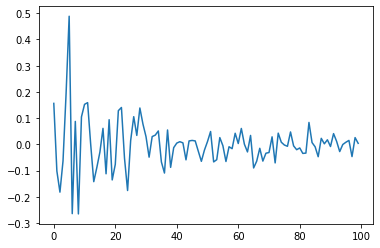

In [38]:
from matplotlib import pyplot
pyplot.plot(svd.components_[:, word_idx])

In [39]:
topic_idx = svd.components_[:, word_idx].argmax() 
topic_idx

5

In [40]:
topic = pd.DataFrame({'word': words, 'loading': svd.components_[topic_idx]}) 
topic.sort_values('loading').tail()

,word,loading
223,무릎,0.117765
616,편하,0.147800
629,하,0.183231
175,때,0.406535
433,운동,0.488684


In [41]:
import numpy as np
nrow, ncol = x.shape

In [42]:
def resample(a):
    return np.random.choice(a, size=nrow)


np.random.seed(2999)
d = np.apply_along_axis(resample, 0, x.A)

d.shape

(333, 658)

In [43]:
svd2 = TruncatedSVD(n_components=100, random_state=1234)
svd2.fit(d)

TruncatedSVD(n_components=100, random_state=1234)

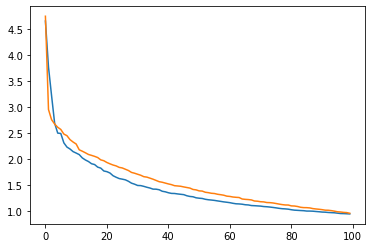

In [44]:
pyplot.plot(svd.singular_values_)
pyplot.plot(svd2.singular_values_)

In [45]:
np.argwhere(svd.singular_values_ - svd2.singular_values_ <= 0)[0]

array([0], dtype=int64)

In [46]:
svd.components_.shape

(100, 658)

## 회전

In [47]:
from factor_analyzer.rotator import Rotator
rotator = Rotator()

In [48]:
rot = rotator.fit_transform(svd.components_.T)

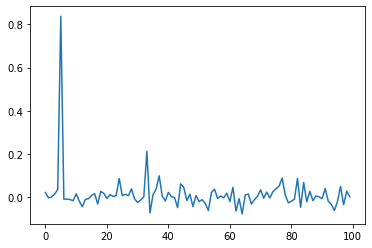

In [49]:
loading = rot.T
word_idx = words.index('운동')
pyplot.plot(loading[:, word_idx])

In [50]:
topic_idx = loading[:, word_idx].argmax()
topic_idx

5

In [51]:
topic = pd.DataFrame({'word': words, 'loading': loading[topic_idx]})
topic.sort_values('loading').tail()

,word,loading
221,무릅,0.089831
175,때,0.111618
46,괜찬아엻,0.116297
27,걱정,0.142224
433,운동,0.837867


In [52]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=20, random_state=1234)
doc_topics = nmf.fit_transform(x)

In [53]:
loading = nmf.components_

In [54]:
word_idx =words.index('운동')

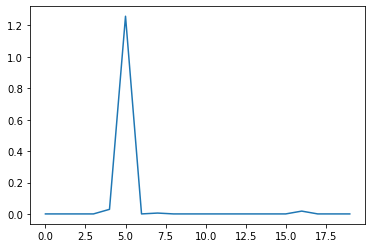

In [55]:
pyplot.plot(loading[:, word_idx])

In [56]:
topic_idx = loading[:, word_idx].argmax()
topic_idx

5

In [57]:
topic = pd.DataFrame({'word': words, 'loading': loading[topic_idx]})
topic.sort_values('loading').tail(7)
# 번주제와 관련도 높은

,word,loading
144,도움,0.118658
627,필수품,0.125828
27,걱정,0.138404
602,통증,0.171550
632,하체,0.195914
175,때,0.734138
433,운동,1.258672


In [60]:
import pandas as pd
df = pd.read_csv('df10.csv', index_col = 0)
df.head()

,review,label
0,무릎 재활하면서 다시 운동을 시작해야해서 지인추천으로 사보았네요. 기존에 에너스킨같...,1
1,5일착용하고 한번 세탁했는데 전혀 이상없음 소재가 굉장히 부드럽고 유연한데 개인에...,1
2,배송도 빠르고 양말도 서비스로 넣어주셔서 감사합니다 무릎보호대중에 다수의 분들이 추...,1
3,제가 착용해보고 너무좋아서 부모님도 선물해드렸더니 너무좋데요 이거 착용하고 부터 운...,1
4,배송최고ㅎㅎ 추전받아서 구입한건데 몇일 착용하고 운동햇더니 무릎이 아프지않고 잡아주...,1


In [61]:
from kiwipiepy import Kiwi
kiwi = Kiwi()
kiwi.prepare()

0

In [62]:
def tokenizer(text):
    words=[]
    result = kiwi.analyze(text)
    for token, pos, _, _ in result[0][0]:
        if pos[0] in 'NV':
            words.append(token)
    return words

In [63]:
docs = []
for text in df.review:
    doc = tokenizer(text)
    docs.append(doc)

In [64]:
from gensim.corpora.dictionary import Dictionary
dic = Dictionary(docs)

C:\ProgramData\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [65]:
dic.filter_extremes(no_below=10, no_above=0.9) 

In [66]:
corpus = []
for doc in docs:
    bow = dic.doc2bow(doc)
    corpus.append(bow)

## LDA

In [67]:
from gensim.models.ldamodel import LdaModel

In [68]:
from sklearn.model_selection import train_test_split
train_corpus, valid_corpus = train_test_split(corpus, test_size=0.1, random_state=1234)

In [69]:
import warnings #경고무시
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [70]:
model = LdaModel(
    corpus=train_corpus,
    id2word=dic,
    num_topics=100, #주제개수
    random_state=1234)

In [71]:
loss = model.log_perplexity(valid_corpus)#성능검사 0에 가까우면 좋음
loss

-22.444819329276566

In [72]:
import numpy

In [73]:
old_loss = -numpy.inf
while loss > old_loss + 0.1:
    model.update(train_corpus)
    old_loss = loss
    loss = model.log_perplexity(valid_corpus)
    print(loss)

-23.090966516617094


In [74]:
model.save('df10-model')

In [75]:
model = LdaModel.load('df10-model')

In [76]:
model

### 결과보기

In [77]:
model.show_topic(2)

[('착용', 0.08380586),
 ('쓰', 0.083805814),
 ('하', 0.0838058),
 ('때', 0.083805785),
 ('좋', 0.0607726),
 ('것', 0.057296555),
 ('빠르', 0.042025164),
 ('보', 0.04202516),
 ('모르', 0.04202515),
 ('불편', 0.04202514)]

In [78]:
dic.token2id['무릎']

5

In [79]:
model.get_term_topics(5, 0.01)

[(2, 0.03093666),
 (3, 0.027467676),
 (6, 0.14645515),
 (7, 0.05227013),
 (8, 0.02113491),
 (10, 0.033266727),
 (13, 0.03832792),
 (14, 0.022511981),
 (16, 0.06548779),
 (22, 0.023270067),
 (24, 0.050642543),
 (27, 0.020573786),
 (29, 0.015764302),
 (30, 0.058638975),
 (31, 0.06836899),
 (33, 0.14209433),
 (34, 0.033741415),
 (35, 0.04837875),
 (37, 0.1730184),
 (38, 0.221568),
 (41, 0.08771324),
 (42, 0.15332901),
 (43, 0.086138286),
 (44, 0.048580676),
 (48, 0.06092885),
 (52, 0.089246444),
 (54, 0.06715507),
 (55, 0.09002927),
 (56, 0.094424084),
 (57, 0.07405797),
 (58, 0.02982011),
 (61, 0.066893645),
 (64, 0.036206704),
 (66, 0.037120726),
 (69, 0.039205197),
 (71, 0.08930366),
 (75, 0.07797078),
 (80, 0.06777826),
 (81, 0.09306704),
 (82, 0.029632863),
 (83, 0.06518195),
 (85, 0.045157302),
 (90, 0.071291454),
 (92, 0.14088461),
 (95, 0.06939095),
 (96, 0.10545744)]

## LDAvis를 통한 결과 시각화

In [80]:
import pyLDAvis.gensim

In [81]:
pyLDAvis.enable_notebook()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
p = pyLDAvis.gensim.prepare(model, corpus, dic, sort_topics=False, mds='mmds')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
pyLDAvis.display(p)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 응집도 계산

In [84]:
from gensim.models import CoherenceModel

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
coh = CoherenceModel(model=model, corpus=corpus, texts=docs, dictionary=dic, coherence='c_v')
coh.get_coherence()
#응집도는 높으면 좋음, 주제 100개와 50개로 비교했을때 뭐가 응집도가 더 높은지 확인해서 주제 개수를 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.33554623812106527